# Taylor Approximations

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demmath01.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon.tools import nodeunif
from matplotlib import cm

## Univariate Taylor approximation

For the function 
$$f(x) = (x+1)\exp(2x) $$

the first-order Taylor approximation is
$$\hat{f}(x) = 1+3x $$

and the second-order approximation is 
$$\hat{f}(x) = 1+3x + 8x^2 $$


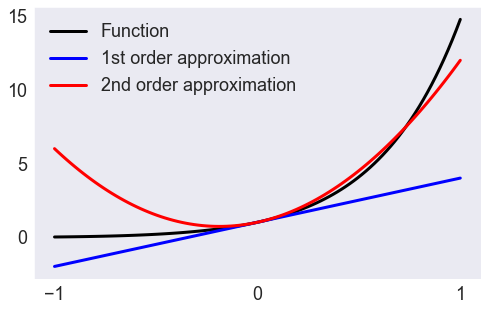

In [2]:
x = np.linspace(-1, 1, 100)
y = (x + 1) * np.exp(2 * x)
y1 = 1 + 3 * x
y2 = 1 + 3 * x + 8 * x ** 2

plt.figure(figsize=[8, 5])
plt.plot(x, y, 'k', linewidth=3, label='Function')
plt.plot(x, y1, 'b', linewidth=3, label='1st order approximation')
plt.plot(x, y2, 'r', linewidth=3, label='2nd order approximation')
plt.legend()
plt.xticks([-1, 0, 1])
plt.show()

## Bivariate Taylor approximation

For the function 
$$g(x) = x_1^2\exp(-x_2) $$

the first-order Taylor approximation around $(1,0)$ is
$$\hat{g}(x) = 2x_1 -x_2 - 1$$

and the second-order approximation is 
$$\hat{g}(x) = x_1^2 - 2x_1 x_2 +0.5x_2^2 + x_2$$


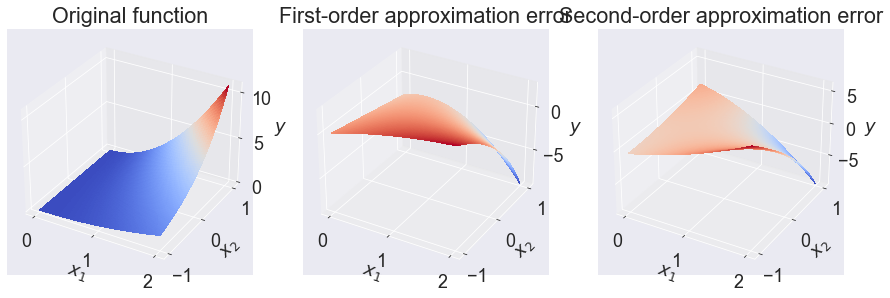

In [3]:
nplot = [101, 101]
a = [0, -1]
b = [2, 1]
x1, x2 = nodeunif(nplot, a, b)
x1.shape = nplot
x2.shape = nplot

y = np.exp(x2) * x1 ** 2
y1 = 2 * x1 - x2 - 1
y2 = x1 ** 2 - 2 * x1 * x2 + 0.5 * x2 ** 2 + x2

def newPlot(title, Y, k):
    ax = fig.add_subplot(1, 3, k, projection='3d')
    ax.plot_surface(x1, x2, Y, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    plt.title(title)

fig = plt.figure(figsize=[15, 6])
newPlot('Original function', y, 1)
newPlot('First-order approximation error', y1-y, 2)
newPlot('Second-order approximation error', y2-y, 3)
plt.show()